In [ ]:
Classifying data with a Linear Support Vector Machines

In [2]:
#load the libraries we have been using
import numpy as np      
import pandas as pd     
import matplotlib.pyplot as plt  #Library for visualization

from sklearn import datasets

iris = datasets.load_iris()
X_w = iris.data[:, :2]  #load the first two features of the iris data 
y_w = iris.target         #load the target of the iris data

#select only the first two classes for both the feature set and target set
#the first two classes of the iris dataset: Setosa (0), Versicolour (1)

X = X_w[y_w < 2]   
y = y_w[y_w < 2]

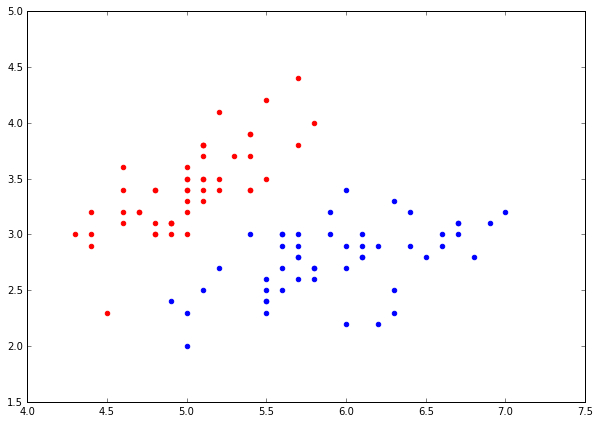

In [4]:
X_0 = X[y == 0]
X_1 = X[y == 1]
#to visualize within IPython
%matplotlib inline            
plt.figure(figsize=(10,7))   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [7]:
from sklearn.svm import SVC

svm_inst = SVC(kernel='linear')
svm_inst.fit(X_train,y_train)
y_pred = svm_inst.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) 

1.0

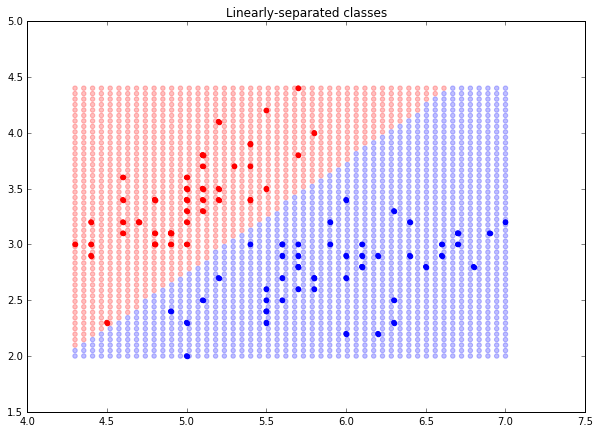

In [10]:
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

#Predictions on the grid
test_preds = svm_inst.predict(test_points)


X_0 = X[y == 0]
X_1 = X[y == 1]

%matplotlib inline
plt.figure(figsize=(10,7))   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

colors = np.array(['r', 'b'])
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Linearly-separated classes")

In [11]:
svm_inst.coef_

array([[ 2.22246001, -2.2213921 ]])

In [12]:
svm_inst.intercept_

array([-5.00384439])

In [13]:
svm_inst

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)